# Housing Data for the country of US has been collected from various public sources. In the analysis below, only quantitative information has been used, since I couldn't come across sufficient reliable qualitative data. 
# Though I wanted to include other features like Loan repayment rates, Academic Qualifications, purchases of property from banks, number of loan defaulters, and data regarding property wholesaling and fix-flip, most datasets provided state-wise or county-wise information only. In this analysis, all datasets account for US, as a whole.
# All datapoints are from the 2002 January to 2020 November timeframe, frequency being monthly and number of datapoints for each feature being 227.
# It is to be noted that a lot of datasets included data in different frequencies -quarterly and weekly. I resampled those datasets to obtain monthly data, in another notebook. Data Cleaning has also been done in another notebook.
# I have tried my best to describe what function has been peformed and the motive behind the same. 
# I tried fitting various other models and performed various other tests on the data. However, I have not included all of them to ensure the code is concise
# The code is divided into two parts: EDA and Regression Analysis, and Time-Series Analysis
# The conclusions can be found in the end.

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.linear_model import LinearRegression

# Below are the functions I have defined to merge all the data I have collected (19 Datasets)

In [92]:
def files(path):
    for file in os.listdir(path):
        if os.path.isfile(os.path.join(path, file)):
            yield file
def wex_input_folder(folder):
    filelist = []
    works = []
    for file in files(folder):
        filelist.append(folder+'/'+file)
    return filelist

# Applying the functions to arrive at the dataframe and making minor changes to the dataframe

In [93]:
l=[]
c= wex_input_folder("/Users/Vishal/Desktop/Housing ML")
c.remove('/Users/Vishal/Desktop/Housing ML/.DS_Store')
for i in c:
    l.append(pd.read_csv(i))
for o in l:
    o.drop(['DATE'] , axis=1 , inplace=True)
df =  l[0]
u=1
while u<len(l):
    df2 = df.join(l[u])
    df=df2
    u+=1

In [94]:
df = df.join(pd.read_csv("/Users/Vishal/Desktop/HPI.csv"))

In [95]:
df.rename({"CSUSHPISA":"House Price Index"} , axis='columns' , inplace=True)

# Part 1: EDA and Regression Analysis

In [96]:
df

,import price index for construction items,monthly supply ratio,housing starts,total construction spending,disposable income,one family houses sold,savings as a percent of income,construction permits,purchasing power,Total construction spending on saety,...,Unemployment rate,Mortgage rates,Employment-population ratio,employees working in construction,construction material price,housing units completed,Vacant housing units,normalised GDP,DATE,House Price Index
0,102.0,4.2,1698,858654,34764,880,6.1,1665,56.5,8468,...,5.7,6.480,62.7,6775,142.0,1632,14342.00000,99.117585,2002-01-01,117.143
1,102.0,4.0,1829,862338,34769,948,5.8,1787,56.2,8818,...,5.7,6.375,63.0,6766,142.2,1671,14297.00000,99.117328,2002-02-01,117.845
2,102.0,4.1,1642,844551,34743,923,5.9,1691,55.9,8035,...,5.7,6.516,62.8,6755,143.2,1559,14252.00000,99.113983,2002-03-01,118.688
3,101.7,4.3,1592,858240,34841,936,5.8,1669,55.6,8025,...,5.9,6.475,62.7,6710,143.5,1625,14207.00000,99.098328,2002-04-01,119.611
4,101.1,4.0,1764,850935,34930,978,6.5,1716,55.6,8023,...,5.8,6.280,62.9,6684,143.8,1705,14265.66667,99.064476,2002-05-01,120.724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,140.7,3.6,1487,1398952,49172,979,18.5,1483,38.6,16577,...,10.2,2.520,55.2,7202,237.0,1338,14246.00000,93.909374,2020-07-01,219.562
223,140.6,3.5,1373,1426884,47502,977,15.0,1476,38.5,15675,...,8.4,2.475,56.5,7226,240.9,1216,14643.00000,95.580060,2020-08-01,222.429
224,141.1,3.6,1437,1423963,47758,965,14.4,1545,38.4,15129,...,7.8,2.385,56.6,7261,246.2,1411,15040.00000,96.456740,2020-09-01,225.656
225,141.0,3.6,1530,1458989,47335,949,13.6,1544,38.4,16170,...,6.9,2.346,57.4,7333,246.4,1343,15437.00000,96.000600,2020-10-01,229.414


In [97]:
df.describe()

,import price index for construction items,monthly supply ratio,housing starts,total construction spending,disposable income,one family houses sold,savings as a percent of income,construction permits,purchasing power,Total construction spending on saety,furniture spending,Unemployment rate,Mortgage rates,Employment-population ratio,employees working in construction,construction material price,housing units completed,Vacant housing units,normalised GDP,House Price Index
count,227.000000,227.000000,227.000000,2.270000e+02,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,134.668722,5.951982,1236.788546,1.066402e+06,39733.026432,677.096916,6.682819,1286.814978,45.626872,9714.837004,8529.211454,6.156828,4.243278,60.425991,6689.863436,197.464317,1206.894273,17194.916300,99.759727,166.918784
std,16.245869,1.930412,471.135513,1.938745e+05,3456.320388,307.481217,3.142165,482.809524,5.066551,2259.859964,983.330142,2.004726,1.202031,2.014194,713.307244,27.556284,443.937877,1381.797437,1.455149,26.373150
min,99.600000,3.500000,478.000000,7.583760e+05,34743.000000,270.000000,2.200000,513.000000,38.400000,6412.000000,4034.000000,3.500000,2.320000,51.300000,5427.000000,142.000000,520.000000,13877.000000,90.536964,117.143000
25%,127.250000,4.500000,888.000000,8.728175e+05,37554.000000,419.000000,5.300000,953.000000,41.900000,8030.000000,7770.000000,4.700000,3.190000,58.700000,6024.000000,181.300000,826.500000,16042.666665,99.536014,145.569000
50%,139.600000,5.400000,1195.000000,1.066848e+06,38734.000000,596.000000,6.700000,1258.000000,44.300000,9314.000000,8594.000000,5.600000,4.040000,60.200000,6768.000000,202.600000,1165.000000,17384.000000,99.930704,165.812000
75%,145.050000,6.700000,1623.000000,1.205092e+06,42085.500000,952.500000,7.500000,1646.500000,49.350000,10727.000000,9330.000000,7.550000,5.379000,62.400000,7315.500000,215.300000,1624.000000,18370.833335,100.377618,183.697000
max,162.500000,12.200000,2273.000000,1.475559e+06,52423.000000,1389.000000,33.700000,2263.000000,56.500000,16577.000000,10403.000000,14.800000,6.516000,63.400000,7726.000000,246.400000,2245.000000,19137.000000,101.832777,232.653000


# We have 227 datapoints to work with. Values of all variables look realistic and there no outliers. Data Cleaning has been performed 

# Let us a plot each variable against the target variable

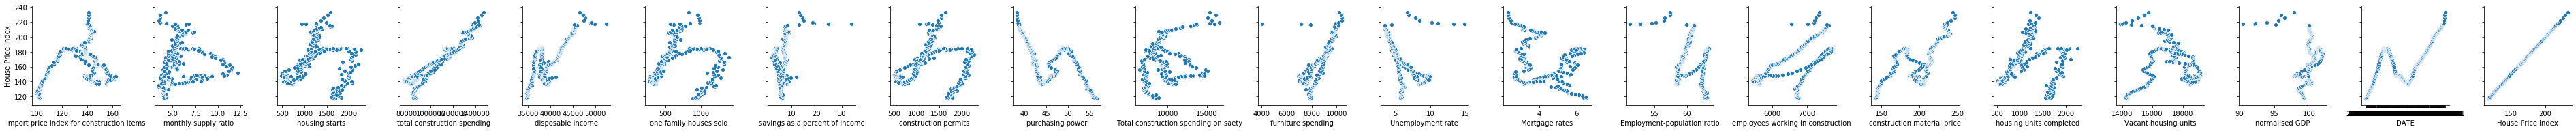

In [8]:
sns.pairplot(data=df , y_vars=['House Price Index'],
                  x_vars=df.columns)

# It can be observed that some variables like construction spending, disposable income , construction material price,  employees working in construction etc. share a considerable linear relationship , while some like mortgage rate, normalised GDP , one family houses sold, do not. Let us take a look at the correlation table

In [98]:
corr_table = df.corr()['House Price Index']

In [99]:
corr_table

import price index for construction items    0.304587
monthly supply ratio                         0.041310
housing starts                               0.141935
total construction spending                  0.959544
disposable income                            0.819926
one family houses sold                       0.083375
savings as a percent of income               0.333977
construction permits                         0.161537
purchasing power                            -0.659586
Total construction spending on saety         0.216129
furniture spending                           0.758056
Unemployment rate                           -0.456474
Mortgage rates                              -0.299855
Employment-population ratio                 -0.104034
employees working in construction            0.641001
construction material price                  0.711566
housing units completed                      0.159331
Vacant housing units                        -0.146878
normalised GDP              

# Considering anything with an absolute value of over 0.6 to be a good correlation co-efficient, we can see that a few variables exhibit a considerable linear relationship with House Price Index

# The next step would be to try to fit in various models and pick the best fit

# A multiple polynomial regression model fitted using sklearn's linear_model can be a good fit. Different degrees can be tried

In [100]:
df.drop('DATE' , axis=1 ,  inplace=True)

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score
X = df.drop('House Price Index' ,  axis=1)
y= df['House Price Index']
scores = []
y_pred_list=[]

vals=[1,2,3]
for i in vals:
    poly = PolynomialFeatures(degree=i)
    poly_X= poly.fit_transform(X)
    X_train, X_test, y_train , y_test = train_test_split(poly_X , y, train_size = 0.8, test_size = 0.2, random_state = 100)
    regression = linear_model.LinearRegression()
    model = regression.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_list.append(y_pred)
    score = r2_score(y_test, y_pred)
    scores.append(score)

# Though the score when the degree is set to 1, is best, going with a degree of 2 is recommended since it takes care of non linear relationships and the Residual Sum of Squres wont deviate drastically for the linear curves

In [103]:
scores

[0.9796040360012397, 0.8307045803310095, 0.5554516857814877]

In [104]:
one = pd.DataFrame(y_pred_list[0])
two = pd.DataFrame(y_pred_list[1])

In [105]:
actual = pd.DataFrame(y_test)

In [106]:
actual.reset_index(level=0 , inplace=True)

In [107]:
comp = actual.join(one)

In [108]:
comp.drop('index' , axis=1 , inplace=True)

In [109]:
comp.rename({0:'Degree One Predicted'} ,  axis='columns' , inplace=True)

In [110]:
comp = comp.merge(two, on=comp.index)

In [111]:
comp.rename({0:'Degree two predicted'} , axis='columns' , inplace=True)

In [112]:
comp.drop('key_0' , axis=1 , inplace=True)

# The table below shows actual vs predicted House Price Index values. As we can see both, degree one and degree two results show low deviations from the mean actual

In [113]:
comp

,House Price Index,Degree One Predicted,Degree two predicted
0,179.681,177.745795,174.500110
1,140.155,142.780424,135.795660
2,163.102,161.017139,161.944995
3,164.062,161.243826,167.003613
4,180.832,182.053124,180.396468
5,201.716,203.528868,203.325889
6,145.632,141.975213,139.599465
7,168.339,167.837736,185.096912
8,184.782,189.116237,183.271575
9,156.976,154.377419,155.729473


In [114]:
sum(comp['Degree One Predicted'])/46

170.41118385258847

In [115]:
sum(comp['House Price Index'])/46

169.5613260869565

In [116]:
sum(comp['Degree two predicted'])/46

171.5989281951836

# When the mean values are taken, they are extremely close to each other

# Moving on to try and fit other models

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [131]:
from sklearn.ensemble import RandomForestRegressor

In [132]:
rf = RandomForestRegressor(n_estimators=10 , random_state=42)
rf.fit(X_train , y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [134]:
y_pred = rf.predict(X_test)

In [135]:
score = r2_score(y_test, y_pred)

In [136]:
score

0.9945567323694069

# 11 trees are hard to visualise. Let us reset the depth

In [144]:
rf.estimators_[5].tree_.max_depth

11

# This is one of the 100 trees. It is to be noted that all 100 trees(models) are making predictions and this is only one such model

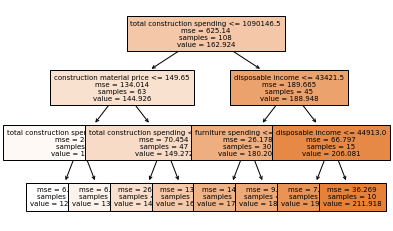

In [151]:
from sklearn import tree
rf = RandomForestRegressor(n_estimators=100, max_depth=3)
rf.fit(X_train, y_train)
_ = tree.plot_tree(rf.estimators_[0], feature_names=X_train.columns, filled=True , fontsize=7)

In [152]:
y_pred = rf.predict(X_test)
score = r2_score(y_test, y_pred)
score

0.9746249719995685

# Though we have already arrived at an excellent R2 score, let us perform some cross-validation

In [159]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100 , 500]
}
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="r2")
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 150 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  2.2min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-

In [160]:
grid_search.best_score_

0.9835140161283245

In [161]:
dt_best = grid_search.best_estimator_
dt_best

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [164]:
rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
rf.fit(X_train , y_train)
y_pred = rf.predict(X_test)
score = r2_score(y_test, y_pred)
score

0.9909172784928434

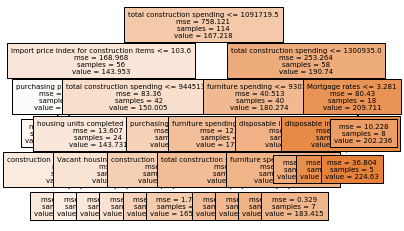

In [166]:
_ = tree.plot_tree(rf.estimators_[49], feature_names=X_train.columns, filled=True , fontsize=7)

# This specific ensemble gives us an r2 score of 99.1% which is excellent for a model. So we can conclude that instead of fitting lines on the plots of the data, taking a conidtion based evaluation approach would give better results, especially for higher values of HPI

In [167]:
y_pred

array([180.40372166, 141.98013212, 160.4041751 , 160.2576192 ,
       179.52275074, 202.09776733, 146.13195861, 168.90972536,
       182.70695697, 152.20274062, 204.02450871, 148.01474609,
       147.94079412, 183.84534252, 195.41251816, 183.2339851 ,
       169.19662371, 201.59884872, 139.47738607, 152.40617896,
       156.87472146, 122.5717457 , 180.38539691, 182.73380007,
       156.67103468, 208.14039616, 203.68477283, 189.062363  ,
       181.22622203, 172.7083863 , 142.52494896, 161.98377591,
       201.68483513, 183.38624285, 139.82275982, 159.48039513,
       140.24617825, 171.95267487, 150.52996496, 160.2576192 ,
       135.97082536, 220.94340655, 156.24795428, 176.08063856,
       220.52562897, 143.42977118])

In [173]:
random_forest = pd.DataFrame(y_pred)

In [174]:
random_forest.rename({0:'Random Forest Predicted'} , axis=1 , inplace=True)

In [175]:
comp = comp.join(random_forest)

In [180]:
try:
    comp.drop('Random Forest Prediction' , axis=1,inplace=True)
except:
    comp=comp

In [182]:
comp = comp.sort_values(by='House Price Index', ascending=False)

# The tables below are for observation 

In [183]:
comp

,House Price Index,Degree One Predicted,Degree two predicted,Random Forest Predicted
41,219.562,230.784925,258.933020,220.943407
44,218.175,227.559564,260.489643,220.525629
25,209.425,211.572272,204.561233,208.140396
32,205.548,204.430532,201.424579,201.684835
10,204.357,203.676095,207.406131,204.024509
26,203.720,205.229693,209.213458,203.684773
5,201.716,203.528868,203.325889,202.097767
17,200.175,201.289250,198.348544,201.598849
14,194.815,194.895001,193.759837,195.412518
27,189.749,190.093636,187.662630,189.062363


In [186]:
comp['Degree one deviation'] = abs(comp['House Price Index']-comp['Degree One Predicted'])
comp['Degree two deviation'] = abs(comp['House Price Index']-comp['Degree two predicted'])
comp['Random Forest deviation'] = abs(comp['House Price Index']-comp['Random Forest Predicted'])

In [187]:
comp

,House Price Index,Degree One Predicted,Degree two predicted,Random Forest Predicted,Degree one deviation,Degree two deviation,Random Forest deviation
41,219.562,230.784925,258.933020,220.943407,11.222925,39.371020,1.381407
44,218.175,227.559564,260.489643,220.525629,9.384564,42.314643,2.350629
25,209.425,211.572272,204.561233,208.140396,2.147272,4.863767,1.284604
32,205.548,204.430532,201.424579,201.684835,1.117468,4.123421,3.863165
10,204.357,203.676095,207.406131,204.024509,0.680905,3.049131,0.332491
26,203.720,205.229693,209.213458,203.684773,1.509693,5.493458,0.035227
5,201.716,203.528868,203.325889,202.097767,1.812868,1.609889,0.381767
17,200.175,201.289250,198.348544,201.598849,1.114250,1.826456,1.423849
14,194.815,194.895001,193.759837,195.412518,0.080001,1.055163,0.597518
27,189.749,190.093636,187.662630,189.062363,0.344636,2.086370,0.686637


# On close observation of the values, we can see that Random Forest predictions are the closest to near values. However, it is to be noted for mid-values (150-170) , polynomial regression has performed slightly better

# Since we have achieved an R2 score of 99%, we need not fit in an XGBoost Regressor

# Part 2: Time Series Analysis

# Preparing the data for visualisation

In [207]:
l=[]
c= wex_input_folder("/Users/Vishal/Desktop/Housing ML")
c.remove('/Users/Vishal/Desktop/Housing ML/.DS_Store')
for i in c:
    l.append(pd.read_csv(i))
for o in l:
    o.drop(['DATE'] , axis=1 , inplace=True)
df =  l[0]
u=1
while u<len(l):
    df2 = df.join(l[u])
    df=df2
    u+=1
df = df.join(pd.read_csv("/Users/Vishal/Desktop/HPI.csv"))
df.rename({"CSUSHPISA":"House Price Index"} , axis='columns' , inplace=True)

In [208]:
time_Series_df = df[['DATE' , 'House Price Index']]

In [209]:
time_Series_df

,DATE,House Price Index
0,2002-01-01,117.143
1,2002-02-01,117.845
2,2002-03-01,118.688
3,2002-04-01,119.611
4,2002-05-01,120.724
...,...,...
222,2020-07-01,219.562
223,2020-08-01,222.429
224,2020-09-01,225.656
225,2020-10-01,229.414


In [210]:
time_Series_df['DATE'] = pd.to_datetime(time_Series_df['DATE'])

/Users/Vishal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [211]:
time_Series_df

,DATE,House Price Index
0,2002-01-01,117.143
1,2002-02-01,117.845
2,2002-03-01,118.688
3,2002-04-01,119.611
4,2002-05-01,120.724
...,...,...
222,2020-07-01,219.562
223,2020-08-01,222.429
224,2020-09-01,225.656
225,2020-10-01,229.414


In [213]:
time_Series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DATE               227 non-null    datetime64[ns]
 1   House Price Index  227 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.7 KB


# Plotting the data

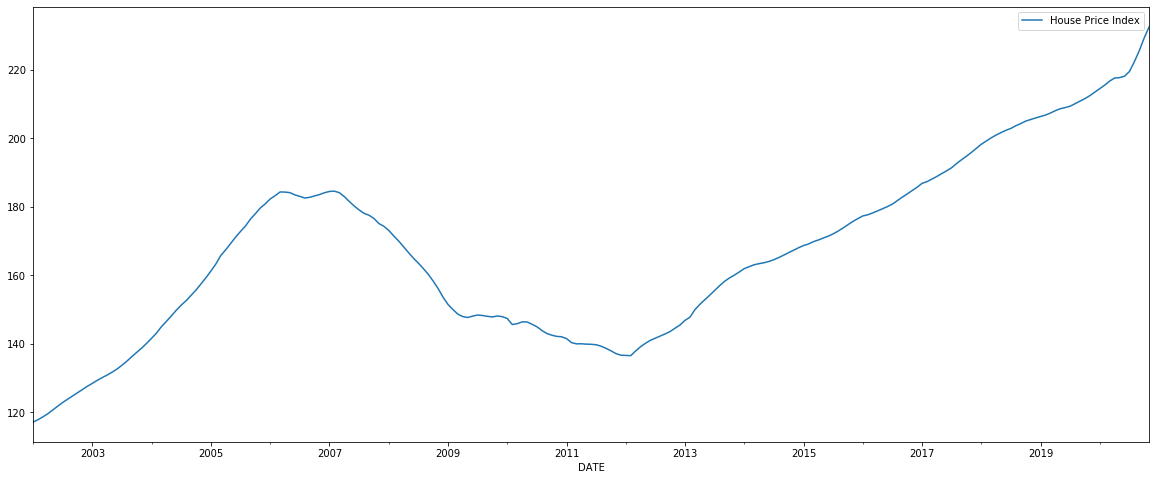

In [216]:
time_Series_df.plot(x='DATE' , figsize=(20, 8))
plt.show()

# Let us take a look at the decomposition

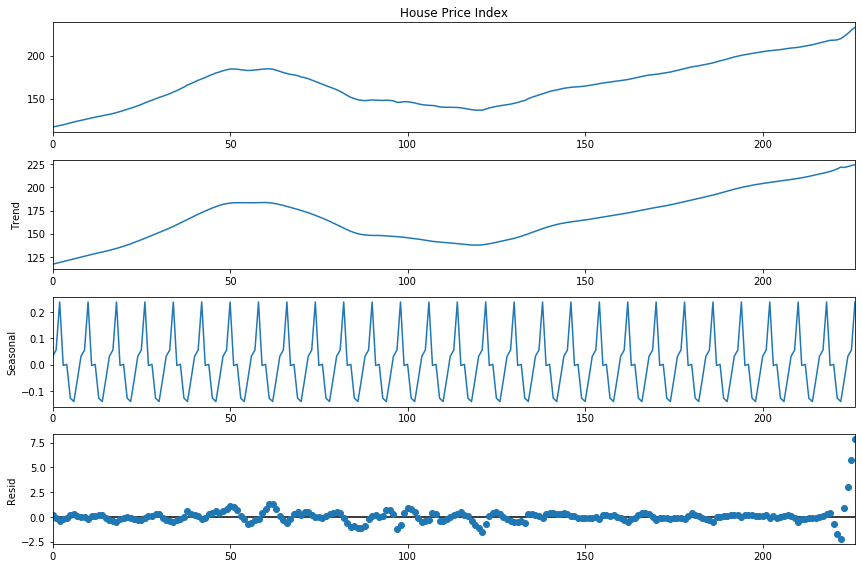

In [228]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(time_Series_df['House Price Index'], model='additive' , extrapolate_trend='freq', period=8)
fig = decomposition.plot()
plt.show()

# We can observe that there is some seasonality when the data is divided into eights. The trend is upward as expected. Since the trend is evident, let us take a look at how Holt's exponential smoothing performs on this data

In [232]:
train_len = 180
train = time_Series_df[0:train_len] # first 180 months as training set
test = time_Series_df[train_len:] # last 47 months as out-of-time test set

In [233]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['House Price Index']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 117.143, 'initial_slope': 0.7019999999999982, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


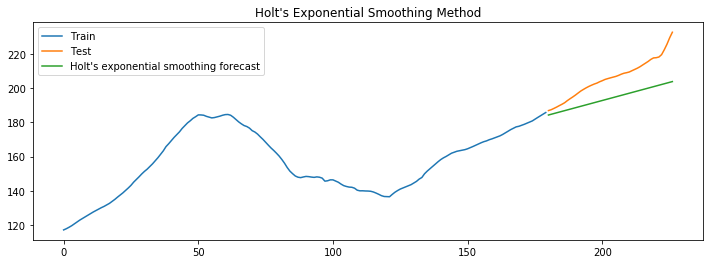

In [234]:
plt.figure(figsize=(12,4))
plt.plot( train['House Price Index'], label='Train')
plt.plot(test['House Price Index'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

# We can observe that the green line(fitted line) is well below the actual continuation of the curve(orange curve). 

In [235]:
mape = np.round(np.mean(np.abs(test['House Price Index']-y_hat_holt['holt_forecast'])/test['House Price Index'])*100,2)

In [236]:
mape

5.58

In [238]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['House Price Index'], y_hat_holt['holt_forecast'])).round(2)
rmse

13.03

# Though MAPE seems to be low, A root mean squared error of 13.03 is pretty high. Let us see if we can obtain improved results using Holt-Winter's exponential smoothing

In [240]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['House Price Index']) ,seasonal_periods=8 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.6315789447069224, 'smoothing_slope': 0.13928157667119917, 'smoothing_seasonal': 0.3684210499700804, 'damping_slope': nan, 'initial_level': 154.37642113997046, 'initial_slope': 0.8422146568092646, 'initial_seasons': array([-36.16677039, -35.75165168, -35.7169321 , -35.9701076 ,
       -36.18204224, -36.2464222 , -35.95577507, -35.23025521]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/Vishal/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


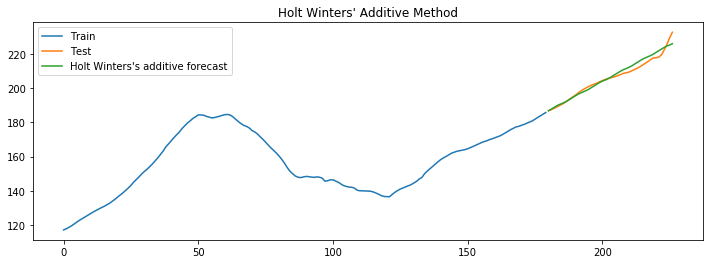

In [241]:
plt.figure(figsize=(12,4))
plt.plot( train['House Price Index'], label='Train')
plt.plot(test['House Price Index'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

# Now we can observe that the green line sits almost perfectly on the orange part of the curve. 

In [242]:
rmse = np.sqrt(mean_squared_error(test['House Price Index'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['House Price Index']-y_hat_hwa['hw_forecast'])/test['House Price Index'])*100,2)

In [243]:
rmse

2.19

In [244]:
mape

0.79

# The results have improved tremendously. 

In [287]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['House Price Index']) ,seasonal_periods=6,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.6315789471221258, 'smoothing_slope': 0.2105299272671194, 'smoothing_seasonal': 0.36842105238528366, 'damping_slope': nan, 'initial_level': 155.8310932747961, 'initial_slope': 0.9914676866945175, 'initial_seasons': array([0.76456429, 0.76665184, 0.76487724, 0.76177714, 0.76171386,
       0.76663019]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/Vishal/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


# Checking if the multiplicative method would yield better results

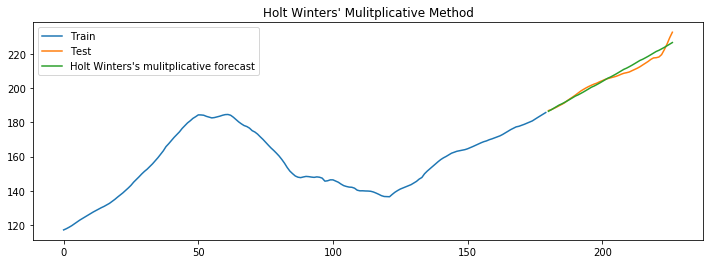

In [288]:
plt.figure(figsize=(12,4))
plt.plot( train['House Price Index'], label='Train')
plt.plot(test['House Price Index'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

In [289]:
rmse = np.sqrt(mean_squared_error(test['House Price Index'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['House Price Index']-y_hat_hwm['hw_forecast'])/test['House Price Index'])*100,2)

In [290]:
rmse

2.23

In [291]:
mape

0.81

# Multiplicative and additive methods exhibit similar performances

# An error of 0.81% (2.23 Index points) is a low one. Auto-Regressive models are not required since we have obtained good accuracy

In [297]:
pred = model_fit.predict(start=test.index[0], end=test.index[-1])

# Creating a dataframe so we can predict HPI for 2022

In [321]:
df_add= pd.DataFrame([['2020-12-01', 0], ['2021-01-01', 0] ,['2021-02-01', 0], ['2021-03-01', 0] , ['2021-04-01', 0] , ['2021-05-01', 0] , ['2021-06-01', 0], ['2021-07-01', 0], ['2021-08-01', 0], ['2021-09-01', 0], ['2021-10-01', 0], ['2021-11-01', 0] ,['2021-12-01', 0], ['2022-01-01', 0] , ['2022-02-01', 0], ['2022-03-01', 0], ['2022-04-01', 0], ['2022-05-01', 0] , ['2022-06-01', 0], ['2022-07-01', 0] ], columns=['DATE' , 'House Price Index'])
df_add

,DATE,House Price Index
0,2020-12-01,0
1,2021-01-01,0
2,2021-02-01,0
3,2021-03-01,0
4,2021-04-01,0
5,2021-05-01,0
6,2021-06-01,0
7,2021-07-01,0
8,2021-08-01,0
9,2021-09-01,0


In [322]:
df_add['DATE'] = pd.to_datetime(df_add['DATE'])

In [323]:
df_try = test.append(df_add)

In [327]:
df_try.index = (list(range(180,247,1)))

In [329]:
pred = model_fit.predict(start=df_try.index[0], end=df_try.index[-1])

In [339]:
new = pd.DataFrame([['Jan 2022' , 238.54912983 ] , ['Feb 2022' , 239.41644337 ], ['March 2022' , 240.35418086 ], ['April 2022' , 241.31442187 ], ['May 2022' , 242.2695893], ['Jun 2022' , 242.92041184 ] , ['Jul 2022' ,243.75648779 ]] , columns=['Month' , 'Predicted House Price Index'])
new



,Month,Predicted House Price Index
0,Jan 2022,238.549130
1,Feb 2022,239.416443
2,March 2022,240.354181
3,April 2022,241.314422
4,May 2022,242.269589
5,Jun 2022,242.920412
6,Jul 2022,243.756488


In [343]:
new['Predicted House Price index lower range'] = 0.9919*(new['Predicted House Price Index'])
new['Predicted House Price index higher range'] = 1.0081*(new['Predicted House Price Index'])

In [345]:
new.drop('Predicted House Price Index' , axis=1 , inplace=True)

# Given below are the higher and lower ranges for predicted HPI for the first 7 months of 2022

In [346]:
new

,Month,Predicted House Price index lower range,Predicted House Price index higher range
0,Jan 2022,236.616882,240.481378
1,Feb 2022,237.477170,241.355717
2,March 2022,238.407312,242.301050
3,April 2022,239.359775,243.269069
4,May 2022,240.307206,244.231973
5,Jun 2022,240.952757,244.888067
6,Jul 2022,241.782060,245.730915


# With that, we come to the end of the analysis and model building

# Conclusions
# 1. The factors that play a crucial role in the determination of HPI are Spending on Construction, Disposable income,number of construction employees, and spending on furniture. Other considerable factors include Purchasing Power and Unemployment rate.
# 2. When making decisions, close attention must be paid to previous years' data since the percentage growth/fall of values of certain features can speak volumes about the future. 
# 3. Surprisingly, data points of housing starts and monthly supply ratio were fairly random.
# 4. Polynomial regression with a degree of two showed good accuracy. If one chooses to go for polynomial regression, a degree of two is recommended.
# 5. The Random Forest Regressor performed exceedingly better than the other forms of regression, thanks to it's condition evaluation based approach.
# 4. Time series analysis showed that the graph of HPI generally follows an upward trend with 'Black-Swan' situations being execeptions (2006-2012). The fall in HPI north of 2006 being due to the Real Estate Market crash and that post 2010 being due to the Dot-com bubble. 
# 5. The graph of HPI exhibits considerable seasonality when divided into eights.
# 6. Holt-Winter's Exponential Smoothing (Additive and Multiplicative) has yielded an excellent accuracy with an error of only 0.81%. This has allowed us to perdict the HPI for the first few months of January. It is to be noted that the higher range of HPI might be slightly higher, with the Housing Market catching up pretty quick, especially after the vaccine release.
# 7. The question that remains is wether we should go with time series or regression for making predictions. The answer - situational. During bubbles or crises, make predictions based on the all available data for that period (regression). In case of normal and smooth course of events, go for time series forecasting.